# Purchase Data Analysis

## Code

In [1]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import plotly.express as px

sns.set()

## Data Loading

The purchase dataset consists of information about the purchases of chocolate candy bars of 500 individuals from a given area when entering a physical FMCG store in a period of 2 years. 

- Data was collected through the loyalty cards customers use at checkout. 
- Data was preprocessed and there are no missing values. 
- The volume of the dataset has been restricted and anonymised to protect the privacy of the customers.
- Each row represents a transaction
- The ID column correspond to the customer ID. Notice that the customers in this dataset are different from the other dataset.

| Variable          | Data type   | Range         | Description                                                                                                        |
|-------------------|-------------|---------------|--------------------------------------------------------------------------------------------------------------------|
| ID                | numerical   | Integer       | Shows a unique   identifier of a customer.                                                                      |
| Day               | numerical   | Integer       | Day when the customer has   visited the store                                                                      |
| Incidence         | categorical | {0,1}         | Indicator whether the  customer has purchased an item from the category of interest                              |
| Brand             | categorical | {0,1,2,3,4,5} | Shows which brand the   customer has purchased. 0=No brand was purchased                                           |
| Quantity          | numerical   | integer       | Number of items bought by   the customer from the product category of interest                                     |
| Last_Inc_Brand    | categorical | {0,1,2,3,4,5} | Shows which brand the   customer has purchased on their previous store visit. 0=No brand was   purchased           |
| Last_Inc_Quantity | numerical   | integer       | Number of items bought by   the customer from the product category of interest during their previous   store visit |
| Price_1           | numerical   | real          | Price of an item from   Brand 1 on a particular day                                                                |
| Price_2           | numerical   | real          | Price of an item from   Brand 2 on a particular day                                                                |
| Price_3           | numerical   | real          | Price of an item from   Brand 3 on a particular day                                                                |
| Price_4           | numerical   | real          | Price of an item from   Brand 4 on a particular day                                                                |
| Price_5           | numerical   | real          | Price of an item from   Brand 5 on a particular day                                                                |
| Promotion_1       | categorical | {0,1}         | Indicator whether Brand 1   was on promotion or not on a particular day                                            |
| Promotion_2       | categorical | {0,1}         | Indicator of whether Brand 2 was on promotion   or not on a particular day                                         |
| Promotion_3       | categorical | {0,1}         | Indicator of whether Brand 3 was on promotion   or not on a particular day                                         |
| Promotion_4       | categorical | {0,1}         | Indicator of whether Brand 4 was on promotion   or not on a particular day                                         |
| Promotion_5       | categorical | {0,1}         | Indicator of whether Brand 5 was on promotion   or not on a particular day                                         |
| Sex             | categorical | {0,1}     | Biological sex (gender)   of a customer. In this dataset there are only 2 different options. 0 = Male,   1=Female                                             |   |
| Marital status  | categorical | {0,1}     | Marital status of a   customer. 0=Single, 1=non-single (divorced / separated / married / widowed)                                                             |   |
| Age             | numerical   | Integer   | The age of the customer   in years, calculated as current year minus the year of birth of the customer   at the time of creation of the dataset               |   |
| Education       | categorical | {0,1,2,3} | Level of education of the   customer. 0=other/unknown, 1=high school, 2=university, 3=graduate   school                                                       |   |
| Income          | numerical   | Real      | Self-reported annual income in US dollars of the customer.                                                                                                    |   |
| Occupation      | categorical | {0,1,2}   | Category of occupation of   the customer. 0=unemployed/unskilled, 1=skilled employee/official,   2=management/self-employed/highly qualified employee/officer |   |
| Settlement size | categorical | {0,1,2}   | The size of the city that the customer lives in. 0=small,   1=mid-sized, 2=big                                                                                |   |

In [2]:
df_purchases = pd.read_csv('data/fmcg-store-purchases.csv')

In [3]:
df_purchases.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


We do not have an equal number of records per customer or an equal number of records per day. So descriptive statistics would neither be appropriate nor useful.

Number of rows in the purchase data?

In [4]:
df_purchases.shape

(58693, 24)

## Segmentation

To segment the new customers in the purchases dataset, we apply the saved models from the segmentation notebook.

Step 1: Standardize the customer columns in the purchase dataset using the saved scaler.

In [5]:
scaler = pickle.load(open('models/segmentation-scaler.pickle', 'rb'))
X_feature_names = pickle.load(open('models/feature-names.pickle', 'rb'))
X = scaler.transform(df_purchases[X_feature_names])

Step 2: Transform the customers from 7 dimensions to 3 dimensions.

In [6]:
pca = pickle.load(open('models/segmentation-pca.pickle', 'rb'))
X_3d = pca.transform(X)

Step 3: Apply k-Means model to segment the data

In [7]:
kmeans_pca = pickle.load(open('models/segmentation-kmeans-pca.pickle', 'rb'))
segments = kmeans_pca.predict(X_3d)

Step 4: Consolidate the segments into the original DataFrame.

In [8]:
df_purchases['Segment'] = segments

# Apply the segment labels
segment_labels = pickle.load(open('models/segment-labels.pickle', 'rb'))
df_purchases['SegmentLabel'] = df_purchases['Segment'].map(segment_labels)

## Descriptive Analysis

First, we want to analyse the purchasing behaviour for customers. 
For that we need to create a new DataFrame where we gather different sets of data.

In [9]:
# Number of visits per customer
df_customer_n_visits = df_purchases[['ID', 'Incidence']].groupby(['ID']).count()
df_customer_n_visits.rename(columns={'Incidence': 'N_Visits'}, inplace=True)
# df_customer_n_visits.head()

In [10]:
# Number of purchases per customer
df_customer_n_purchases = df_purchases[['ID', 'Incidence']].groupby(['ID']).sum()
df_customer_n_purchases.rename(columns={'Incidence': 'N_Purchases'}, inplace=True)
# df_customer_n_purchases.head()

In [11]:
# Create a new DataFrame which hold all the statistics
df_customer_stats = df_customer_n_purchases.join(df_customer_n_visits)

In [12]:
# Compute the purchase frequency per customer.
df_customer_stats['Purchase_Freq'] = df_customer_stats['N_Purchases'] / df_customer_stats['N_Visits']
# df_customer_stats.head()

In [13]:
# Since each customer has a unique SegmentLabel, we can pick the first one.
df_customer_segment = df_purchases[['ID', 'SegmentLabel']].groupby(['ID']).first()

df_customer_stats = df_customer_stats.join(df_customer_segment)
df_customer_stats.head()

,N_Purchases,N_Visits,Purchase_Freq,SegmentLabel
ID,,,,
200000001,9,101,0.089109,fewer-opportunities
200000002,11,87,0.126437,well-off
200000003,10,97,0.103093,fewer-opportunities
200000004,11,85,0.129412,fewer-opportunities
200000005,13,111,0.117117,standard


### Visits per Segment

In [15]:
N_customers = df_customer_stats.shape[0]

df_segment_proportions = df_customer_stats[['N_Purchases', 'SegmentLabel']].groupby(['SegmentLabel']).count() / N_customers
df_segment_proportions = df_segment_proportions.rename(columns={'N_Purchases': 'Proportion'})
df_segment_proportions.head()

,Proportion
SegmentLabel,
career-focused,0.208
fewer-opportunities,0.376
standard,0.220
well-off,0.196


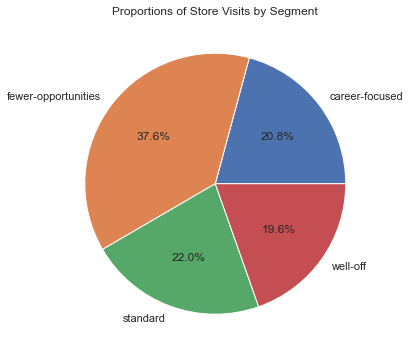

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(
    x=df_segment_proportions['Proportion'], 
    labels=df_segment_proportions.index.values,
    autopct='%1.1f%%'
)
ax.set_title('Proportions of Store Visits by Segment');

The pie charts gives us an idea of how store visitors are distributed across segments.